In [444]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [445]:
df_vehiculos = pd.read_csv('./data/vehículos_uy.csv', index_col= 0)
df_vehiculos.head()

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,tipo_combustible,puertas,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion
id,,,,,,,,,,,,,,,,,,,,,
MLU641972861,Effa Dd1020b,USD,7890,Effa,Aojun,2.2 Full,Usado,2008,128966,104 hp,...,Nafta,4,Sí,Negro,Tienda no oficial,1191163726,AUTOMOVILESAUTOPARQUE202209021,2024-10-30T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-641972861...
MLU642462133,Effa Aojun 2007 2.2 Full,USD,6500,Effa,Aojun,2.2 Full,Usado,2007,150000,104 hp,...,Nafta,4,Sí,color_no_especificado,Tienda no oficial,87166142,DALEBUMA,2024-08-08T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-642462133...
MLU680049266,Effa Cargo 2011 1.0 4 P,USD,6990,Effa,Cargo,1.0 4 p,Usado,2011,106000,49 hp,...,Nafta,4,Sí,color_no_especificado,Tienda no oficial,75820615,FEDE-2009,2024-09-18T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-680049266...
MLU681670000,Effa Plutus Doble Cabina Full 2.4,USD,8900,Effa,Plutus,Full,Usado,2008,149230,potencia_no_especificado,...,Nafta,5,Sí,Beige,Tienda no oficial,149216512,GALBO MOTORS,2024-10-04T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-681670000...
MLU680125002,Effa Cargo Doble Cabina 2011 1.0 4 P,USD,6990,Effa,Cargo,1.0 4 p,Usado,2011,106000,49 hp,...,Nafta,4,Sí,Gris,Tienda no oficial,143416016,AZUL AUTOMOVILES,2024-09-19T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-680125002...


Para poder analizar correctamente el mercado de vehículos debemos trabajar con la misma moneda dólares (USD), convertiremos la moneda Pesos Uruguayos (UYU) utilizando  el tipo de cambio (tc) interbancario del Banco República del Uruguay del día. Vale aclarar además que el tc se ha mantenido estable en los últimos años.

La cotización interbancaria al día 26/07/2024: $40,28.

Pero nos encontramos además con el siguiente problema, hay valores ingresados como monoeda UYU que en realidad son en USD. Como primer análisis voy a observar si los vehículos nuevos con moneda pesos, son en realidad usd. Es decir, por conocimiento del mercado ningún vehículo nuevo tiene un valor por debajo de 10.000 usd. 

In [446]:
df_vehiculos.loc[(df_vehiculos['moneda'] == 'UYU') & (df_vehiculos['condicion'] == "Nuevo")]

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,tipo_combustible,puertas,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion
id,,,,,,,,,,,,,,,,,,,,,
MLU640524989,Suzuki Vitara Hybrida,UYU,36990,Suzuki,Vitara,1.6 Glx 5p Aut,Nuevo,2024,0,120 hp,...,Nafta,5,Sí,Blanco,Tienda no oficial,242003969,AUTO_BOULEVARD,2025-06-06T18:23:53.002Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-640524989...
MLU679670362,Ram Rampage R/t 272 Hp Mopacar Punta Del Este,UYU,65490,RAM,Rampage,Rampage Hurricane4 R/T AT9 4x4,Nuevo,2024,0,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Blanco,Tienda no oficial,827194273,MOPACAR SALES,2025-05-13T04:00:00.000Z,gold,https://auto.mercadolibre.com.uy/MLU-679670362...
MLU679836158,Ram Rampage Laramie 0km,UYU,63490,RAM,Rampage,2.0 Multijet Laramie At9 4X4,Nuevo,2024,0,170 hp,...,Diésel,4,Sí,Blanco,Tienda no oficial,827194273,MOPACAR SALES,2025-05-19T04:00:00.000Z,gold,https://auto.mercadolibre.com.uy/MLU-679836158...
MLU679848928,Jeep Renegade Longitude Full 0km,UYU,41490,Jeep,Renegade,1.3 Longitude Full At6 5p,Nuevo,2024,0,175 hp,...,Nafta,5,Sí,Blanco,Tienda no oficial,827194273,MOPACAR SALES,2025-05-19T04:00:00.000Z,gold,https://auto.mercadolibre.com.uy/MLU-679848928...
MLU683802764,Toyoto Carolla Cross Xeg,UYU,44990,Toyota,Corolla Cross,1.8 Xei Hybrid E-cvt,Nuevo,2024,0,146 hp,...,Híbrido,5,Sí,Blanco,Tienda no oficial,242003969,AUTO_BOULEVARD,2025-06-21T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-683802764...
MLU680228892,Fiat Toro Freedom 1.3turbo Automatica 6v,UYU,29990,Fiat,Toro,1.3 Freedom At6 Fwd,Nuevo,2024,0,180 hp,...,Nafta,4,Sí,Gris,Tienda no oficial,137183965,FABIANCARRICA,2025-05-23T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-680228892...
MLU681065472,Ioniq 5,UYU,58990,Hyundai,Ioniq,1.6 Gdi Hibrido At 5p,Nuevo,2023,0,92 hp,...,Híbrido,4,Sí,Gris,Tienda no oficial,330207315,KONIFANSAHERNANDEZ,2025-05-30T04:00:00.000Z,gold,https://auto.mercadolibre.com.uy/MLU-681065472...
MLU640541677,Hyundai Creta,UYU,32990,Hyundai,Creta,1.0 T-Gdi Safe At,Nuevo,2023,0,120 hp,...,Nafta,5,aire_acondicionado_no_especificado,Gris,Tienda no oficial,330207315,KONIFANSAHERNANDEZ,2025-06-06T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-640541677...
MLU674527814,Suzuki Swift Hibrido 1.2 2024,UYU,22990,Suzuki,Swift,1.2 Hybrid Dualjet Shvs Gls Mt,Nuevo,2024,0,90 hp,...,Híbrido,5,aire_acondicionado_no_especificado,Azul,Tienda no oficial,242003969,AUTO_BOULEVARD,2025-03-22T11:39:55.035Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-674527814...


In [447]:
df_vehiculos.loc[(df_vehiculos['moneda'] == "UYU") & (df_vehiculos['condicion'] == "Nuevo") & (df_vehiculos['precio'] < (10000 * 40.28)), 'moneda'] = 'USD'

In [448]:
df_vehiculos.loc[(df_vehiculos['moneda'] == 'UYU') & (df_vehiculos['condicion'] == "Nuevo")]

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,tipo_combustible,puertas,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion
id,,,,,,,,,,,,,,,,,,,,,


In [449]:
#Aplico un filtro, para detectar los vehículos usados que claramente tienen mal la moneda. 
# Es decir vehículos que tienen un valor en dólares por debajo de 860 usd, lo cual es ilógico (además lo corroboré observando el resultado del filtro)
df_vehiculos.loc[(df_vehiculos['moneda'] == "UYU") & (df_vehiculos['anio_vehiculo'] > 2010) & (df_vehiculos['precio'] < (860 * 40.28)), 'moneda'] = 'USD'

In [450]:
df_vehiculos.loc[(df_vehiculos['moneda'] == "UYU") & (df_vehiculos['anio_vehiculo'] > 2010) & (df_vehiculos['precio'] < (860 * 40.28))]

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,tipo_combustible,puertas,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion
id,,,,,,,,,,,,,,,,,,,,,


In [451]:
#Aplico otro filtro, para detectar los vehículos usados que claramente tienen mal la moneda. 
# en este cado vehículos que tienen un valor en dólares por encima de 30000 usd, y el año superior a 2012
#  (además lo corroboré observando el resultado del filtro)
df_vehiculos.loc[(df_vehiculos['moneda'] == 'UYU') & (df_vehiculos['precio'] > (30000 * 40.28)) & (df_vehiculos['anio_vehiculo'] > 2012), 'moneda'] = 'USD'

In [452]:
# Por último, una vez corregido los que tenían bien el precio y mal la moneda, voy a hacer la converison de los restantes
# Cotización interbancaria al día 26/07/2024: $40,28
df_vehiculos.loc[df_vehiculos['moneda'] == "UYU", 'precio'] = np.round(df_vehiculos.loc[df_vehiculos['moneda'] == 'UYU', 'precio'] / 40.28, 0)
df_vehiculos.loc[df_vehiculos['moneda'] == "UYU", 'moneda'] = 'USD'


In [453]:
df_vehiculos.aire_acondicionado.value_counts()

aire_acondicionado
Sí                                    12595
aire_acondicionado_no_especificado     5695
No                                      211
Name: count, dtype: int64

### Creación de una nueva columna que indique el estado del vehículo

Se crearán los siguientes estados:
- Nuevo
- Como nuevo
- En buenas condiciones
- Con desgaste moderado
- Con alto desgaste
- Para Desguace

In [454]:
#Compruebo visulmente que si aplico el filtro en el título clasifico de buena manera los "Para desguace"
filtro_desguace = df_vehiculos['titulo'].str.contains('chocado|partes|resto|respuestos|chocada', case=False)
df_vehiculos_desguace = df_vehiculos[filtro_desguace]
df_vehiculos_desguace

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,tipo_combustible,puertas,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion
id,,,,,,,,,,,,,,,,,,,,,
MLU639107825,Oportunidad Haima 3 Chocado Entero O Por Partes,USD,4200,Haima,Haima,haima tres,Usado,2013,11111,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Blanco,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-08-19T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639107825...
MLU639650279,Oportunidad Haima 2 Chocado Entero O Por Part...,USD,2850,Haima,Haima,Haima 2,Usado,2012,1111111,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Plateado,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-09-03T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639650279...
MLU639133767,Audi A3 A4 Y A6 Chocados Enteros O Por Partes,USD,5500,Audi,Audi,Audi A 3-4 y 6 por partes,Usado,2015,11111,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Rojo,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-08-19T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639133767...
MLU641544761,Suzuki Celerio 2013 Chocado Oportunidad Mucho ...,USD,7773900,Suzuki,Celerio,Oportunidad chocado mucho margen fácil de reparar,Usado,2013,60000,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Negro,Tienda no oficial,73720576,CHARLESREBOLLO2009,2024-07-23T04:00:12.784Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-641544761...
MLU681874370,Suzuki Vitara Chocada Motor 2.4 Solo Por Part...,USD,11999,Suzuki,Suzuki,Suzuki grand vitara 2.4,Usado,2010,11111,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Negro,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-10-07T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-681874370...
MLU639120743,Entero O Por Partes Suzuki Celerio Chocado Pa...,USD,2200,Suzuki,Suzuki,Suzuki Celerio,Usado,2016,11111,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Gris,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-08-19T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639120743...
MLU639572897,Oportunidad Suzuki Alto Chocado Volcado En Mar...,USD,3500,Suzuki,Suzuki,Suzuki Alto 800,Usado,2017,11111,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Gris,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-09-03T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639572897...
MLU681385402,Suzuki Celerio No Chocado En Marcha Entero O...,USD,1899,Suzuki,Suzuki,suzuki Celerio,Usado,2012,11111,potencia_no_especificado,...,Nafta,4,aire_acondicionado_no_especificado,Blanco,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-10-01T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-681385402...
MLU639585905,Peugeot Partner B9 Diesel Por Partes Solo Para...,USD,3900,Peugeot,Peugeot,1.6 turbo diesel,Usado,2018,11111,potencia_no_especificado,...,Diésel,2,aire_acondicionado_no_especificado,Blanco,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-09-03T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639585905...


In [455]:
df_vehiculos.kilometraje.info()

<class 'pandas.core.series.Series'>
Index: 18501 entries, MLU641972861 to MLU684441434
Series name: kilometraje
Non-Null Count  Dtype
--------------  -----
18501 non-null  int64
dtypes: int64(1)
memory usage: 805.1+ KB


In [456]:
# Una vez comprobado que el filtro funciona creo una función para la creación de la columna
def categorica_estados (row):
    if 'chocado' in row['titulo'].lower() or 'partes' in row['titulo'].lower() or 'resto' in row['titulo'].lower() or 'respuestos' in row['titulo'].lower():
        return 'Para desguace'
    elif row['condicion'] == 'Nuevo':
        return 'Nuevo'
    elif row['kilometraje'] < 15000 and row['anio_vehiculo'] >= 2022:
        return 'Como nuevo'
    elif row['kilometraje'] < 50000:
        return 'Pocos kilometraje'
    elif row['kilometraje'] < 100000:
        return 'Moderado kilometraje'
    elif row['kilometraje'] < 180000:
        return 'Bastante kilometraje'
    elif row ['kilometraje'] < 250000:
        return 'Mucho kilometraje'
    else:
        return 'Excesivo kilometraje'

df_vehiculos['cat_kilometros'] = df_vehiculos.apply(categorica_estados, axis=1)



In [457]:
#Existen algunas publicaciones que no corresponden a venta de vehículos o que corresponden a ventas de 
#Vehículos con deuda, lo cual puede generar outlider innecesarios
#Utilizando un filtro en el título los identifico y eliminaré estas filas

filtro_deuda = df_vehiculos['titulo'].str.contains('compro | deuda', case=False)
df_vehiculos_deuda = df_vehiculos[filtro_deuda]
df_vehiculos_deuda

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,puertas,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion,cat_kilometros
id,,,,,,,,,,,,,,,,,,,,,
MLU686028738,Compro Autos Aun Con Embargo,USD,9550,Compro,AUTOS AUN CON EMBARGO,CONTADO VOY AL INTERIOR,Usado,2013,98700,potencia_no_especificado,...,5,Sí,Negro,Tienda no oficial,550381819,BRISAVENTILATT,2024-08-04T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-686028738...,Moderado kilometraje
MLU686481898,"Compro Vehiculos Con O Sin Deuda,aun Con Embar...",USD,8700,Hyundai,i10,GL FULL 1.1,Usado,2013,74300,potencia_no_especificado,...,5,Sí,Dorado,Tienda no oficial,251440103,VENTA 33,2024-08-09T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-686481898...,Moderado kilometraje
MLU642465033,Compro Autos,USD,9000,Chevrolet,Corsa,1.8 Gl Aa+da,Usado,2009,130000,102 hp,...,4,Sí,Gris,Tienda no oficial,1076718604,BUGLIARIPATRICIA20220218183838,2024-08-08T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-642465033...,Bastante kilometraje
MLU687472670,Compro Vehiculos Con O Sin Deuda Aun Con Embargo,USD,99498013,Chevrolet,Spark,1.0 Full,Usado,2008,127800,65 hp,...,5,Sí,Gris,Tienda no oficial,550381819,BRISAVENTILATT,2024-08-19T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-687472670...,Bastante kilometraje
MLU684597732,Honda Accord Chocado Con Deuda,USD,6666,Honda,Accord,Chocado con deuda,Usado,1988,1111,potencia_no_especificado,...,4,aire_acondicionado_no_especificado,color_no_especificado,Tienda no oficial,52500959,VENDOCELULARES..,2024-07-26T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-684597732...,Para desguace


In [458]:
df_vehiculos = df_vehiculos[~filtro_deuda]
df_vehiculos_deuda = df_vehiculos[filtro_deuda]
df_vehiculos_deuda

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/2026937264.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_vehiculos_deuda = df_vehiculos[filtro_deuda]


,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,puertas,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion,cat_kilometros
id,,,,,,,,,,,,,,,,,,,,,


In [459]:
# Se detectan publicaciones cuyos precios están evidentemente mal indicados, y no parece ni siquiera un error en 
#El tipo de moneda, por lo que se decide eliminar los mismos de la muestra
filtro_atipicos = df_vehiculos['precio']>451000
filtro_atipicos

id
MLU641972861    False
MLU642462133    False
MLU680049266    False
MLU681670000    False
MLU680125002    False
                ...  
MLU642589241    False
MLU687370084    False
MLU687416434    False
MLU686687706    False
MLU684441434    False
Name: precio, Length: 18496, dtype: bool

In [460]:
#Elimino las filas que cumplen con el filtro
df_vehiculos = df_vehiculos[~filtro_atipicos]

In [461]:
# Se detectan ciertos vehículos que evidentemente fueron ingresados con moneda usd cuando correspondía UYU
# Se corrigen aplicando el tc 

filtro_error_moneda = (df_vehiculos['precio']>30000) & (df_vehiculos['modelo'].str.contains ('kombi|corsa|celerio', case=False))
df_vehiculos_filtrado = df_vehiculos[filtro_error_moneda]
print(df_vehiculos_filtrado)

                                   titulo moneda  precio       marca modelo  \
id                                                                            
MLU685551774   Volkswagen Kombi  Kombi 68    USD  248262  Volkswagen  Kombi   
MLU685636286  Chevrolet Corsa 1996 1.4 Gl    USD  160000   Chevrolet  Corsa   

               version condicion  anio_vehiculo  kilometraje  \
id                                                             
MLU685551774  Kombi 68     Usado           1999            1   
MLU685636286    1.4 Gl     Usado           1996       111111   

                              potencia  ... puertas  \
id                                      ...           
MLU685551774  potencia_no_especificado  ...       4   
MLU685636286                     60 hp  ...       3   

                              aire_acondicionado                  color  \
id                                                                        
MLU685551774  aire_acondicionado_no_especificado  color

In [462]:
df_vehiculos.loc[filtro_error_moneda, 'precio'] /= 40.28

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/2086256729.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6163.4061569  3972.19463754]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_vehiculos.loc[filtro_error_moneda, 'precio'] /= 40.28


In [463]:
# Se detecta una publicación con un precio incorrecto que no es posible determinar si es un error de moneda

filtro_error_precio = (df_vehiculos['precio']>30000) & (df_vehiculos['modelo'].str.contains ('kombi|corsa|alto|celerio', case=False))
df_vehiculos_filtro_precio = df_vehiculos[filtro_error_precio]
print(df_vehiculos_filtro_precio)

                                                         titulo moneda  \
id                                                                       
MLU684556356  Suzuki Alto 2018 Extrafull Nuevo U$s 4950 Y Ce...    USD   

               precio   marca modelo                     version condicion  \
id                                                                           
MLU684556356  95000.0  Suzuki   Alto  EXTRAFULL FLAMANTE DE TODO     Usado   

              anio_vehiculo  kilometraje                  potencia  ...  \
id                                                                  ...   
MLU684556356           2018        58000  potencia_no_especificado  ...   

             puertas                  aire_acondicionado color  \
id                                                               
MLU684556356       5  aire_acondicionado_no_especificado  Azul   

                 tienda_oficial  id_seller         nickname  \
id                                                    

In [464]:
df_vehiculos = df_vehiculos[~filtro_error_precio]

In [465]:
def clasificar_segmento(row):
    if row['precio'] > 100000:
        return 'Vehículos de lujo'
    elif row['precio'] > 60000:
        return 'Gama alta'
    elif row['precio'] > 30000:
        return 'Gama media alta'
    elif row['precio'] > 15000:
        return 'Gama media'
    else:
        return 'Gama baja'

# Aplicar la función a cada fila para crear la nueva columna
df_vehiculos['segmento_economico'] = df_vehiculos.apply(clasificar_segmento, axis=1)


In [466]:
# Voy a reemplazar una publicación que se encuentra con el tipo de combustible Hibrido/Nafta a Hibrido
df_vehiculos['tipo_combustible'] = df_vehiculos['tipo_combustible'].replace('Híbrido/Nafta', 'Híbrido')

In [467]:
# Se encontró además que una de las publicaciones tiene un anio_vehiculo erroneo que puede distorcionar el análisis:
df_vehiculos.loc[df_vehiculos['anio_vehiculo'] > 2025]

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion,cat_kilometros,segmento_economico
id,,,,,,,,,,,,,,,,,,,,,
MLU641738239,Volkswagen Gol 1.6 Serie 101cv,USD,10000.0,Volkswagen,Gol,1.6 Serie 101cv,Usado,436662,144000,101 hp,...,Sí,Gris,Tienda no oficial,199390758,MIMA9405977,2024-07-27T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-641738239...,Bastante kilometraje,Gama baja


In [468]:
df_vehiculos.loc[df_vehiculos['kilometraje'] > 1000000]

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion,cat_kilometros,segmento_economico
id,,,,,,,,,,,,,,,,,,,,,
MLU639650279,Oportunidad Haima 2 Chocado Entero O Por Part...,USD,2850.0,Haima,Haima,Haima 2,Usado,2012,1111111,potencia_no_especificado,...,aire_acondicionado_no_especificado,Plateado,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-09-03T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639650279...,Para desguace,Gama baja
MLU642387115,Auto Eléctrico - Excelente Estado,USD,5000.0,Yasuki,Otro,0.8,Usado,2020,1111111,potencia_no_especificado,...,Sí,Azul,Tienda no oficial,262005113,CAVIC1981,2024-08-07T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-642387115...,Excesivo kilometraje,Gama baja
MLU641955533,Fiat Fiorino 1300 Cc Año 1998,USD,2781.0,Fiat,Fiorino,Furgon 1.3,Usado,1999,1111111,potencia_no_especificado,...,aire_acondicionado_no_especificado,Blanco,Tienda no oficial,77760874,ARTISTAMARCIAL2004,2024-08-01T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-641955533...,Excesivo kilometraje,Gama baja
MLU642589975,Fiat Fiorino,USD,2011.0,Fiat,Fiorino,1.7 D,Usado,1996,1111111,58 hp,...,aire_acondicionado_no_especificado,Blanco,Tienda no oficial,23134417,VIC_O2010,2024-08-12T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-642589975...,Excesivo kilometraje,Gama baja
MLU686583656,Fiat,USD,30000.0,Fiat,Fiorino,1.3 Fire,Usado,2010,1111111,68 hp,...,No,Blanco,Tienda no oficial,246053663,LTM LIBERTAD,2024-08-09T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-686583656...,Excesivo kilometraje,Gama media
MLU639612151,Jac J2 Chocado Entero O Por Partes En Marcha A...,USD,2900.0,JAC,J2,1.4 16v Jetflex 5p,Usado,2015,1111111,110 hp,...,Sí,Negro,Tienda no oficial,119656669,VILLALBAANDRES2012,2024-09-03T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-639612151...,Para desguace,Gama baja
MLU683264508,Jeep Renegade Sport 1.8 2016 Impecable!,USD,19900.0,Jeep,Renegade,Sport,Usado,2016,1111111,130 hp,...,Sí,Blanco,Tienda no oficial,91144003,AUTOPLUS SRL,2024-10-17T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-683264508...,Excesivo kilometraje,Gama media
MLU685414452,Jeep Cj2a,USD,7500.0,Jeep,CJ2A,1946,Usado,1999,1111111,potencia_no_especificado,...,aire_acondicionado_no_especificado,Amarillo,Tienda no oficial,1292784,JANO452014,2024-08-01T04:00:38.335Z,gold,https://auto.mercadolibre.com.uy/MLU-685414452...,Excesivo kilometraje,Gama baja
MLU685785014,Jeep Willy Cj5,USD,2100.0,Jeep,WILLY CJ5,CJ5,Usado,1999,1111111,potencia_no_especificado,...,aire_acondicionado_no_especificado,Plateado,Tienda no oficial,75722018,PITICA108,2024-08-03T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-685785014...,Excesivo kilometraje,Gama baja


In [469]:
filtro_anio_mal = df_vehiculos['anio_vehiculo'] > 2025
df_vehiculos = df_vehiculos[~filtro_anio_mal]

## A continuación se presenta el cuadro que tipifica las distintas variantes


In [470]:
df_tipificacion = pd.DataFrame([df_vehiculos.nunique(), df_vehiculos.nunique()/len(df_vehiculos) * 100, 
                                df_vehiculos.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
titulo,15333,82.957312,object,Numerica Continua
moneda,1,0.00541,object,Categorica
precio,1258,6.806254,float64,Numerica Discreta
marca,179,0.968458,object,Numerica Discreta
modelo,1672,9.046151,object,Numerica Discreta
version,7713,41.730239,object,Numerica Continua
condicion,2,0.010821,object,Binaria
anio_vehiculo,56,0.302981,int64,Numerica Discreta
kilometraje,3075,16.63691,int64,Numerica Discreta
potencia,291,1.57442,object,Numerica Discreta


| Nombre del campo| Descripción              | Tipo de variable  | Importancia Inicial | Notas                 |
|-----------------|--------------------------|-------------------|---------------------|-----------------------|
| id              | ID de la publicación     | Índice Único        | -                   | Identificador único de la publicación    |
| moneda          | Moneda en USD             | Valor único        | -                   | Indica la moneda del precio - Dólares (USD) |
| precio          | Indica el precio del vehículo| Numerica Contínua | 0               | Indicador precio del vehículo  |
| marca           | Indica la marca del vehículo | Categórica  | 1              | Es un valor muy importante para el análisis |
| modelo          | Subcategoría dentro de la marca | Categórica| 2         | También es un factor muy relevante para el análisis |
| version         | Subcategoría dentro del modelo | Categórica | 3              | Determina la variante dentro del modelo, en general refiere a los distintos atributos, por ejemplo extras de confort, seguridad, etc.  |
| condicion       | Indica si es nuevo o usado  | Binaria         | 1                 | Es un factor fundamental para filtrar los vehículos usados o nuevos |
| anio_vehiculo   | Indica el año del vehículo | Numerica Discreta | 2                | Esto indica el año de fabricación del vehículo aunque no queda claro si en algunos casos se le asigna según el primer año de uso|
| kilometraje     | Indica el kilometraje del vehículo     | Numerica Contínua     | 2               | Es importante para determinar el desgaste del vehículo  |
| potencia        | Indica la potencia medida en caballos de fuerza (hp) | Numerica Discreta | 3   | Está relaiconado con la versión|
| transmision    | Indica el tipo de transmisión   | Categórica            | 3      | Podría tener relevancia si supiéramos como incide en el comprador |
| control_traccion | Indica la tracción del vehículo | Categórica          | 3      | Podría tener relevancia si supiéramos como incide en el comprador             |
| tipo_combustible | Indica el tipo de combusitble que utiliza el vehículo | Categórica   | 3   | Es importante sobre todo para filtrar a los eléctricos, mercado en crecimiento |
| aire_acondicionado | Indica si el vehículo cuenta con A/C | Binaria     | 3            | Al no ser un atirbuto obligatorio, faltan datos sobre muchos vehículos|
| color     | Indica el color del vehículo | Categórica      | 3            | A priori no tendría influencia en el precio, preferencias subjetivas  |
| tienda_oficial | Indica si se trata de una tienda oficial reconocida por ML | Categórica  | 3   | Se observan automotoras importantes que no tienen este reconocimiento, valor difícil de ponderar  |
| id_seller | El id que tiene el usuario que publica el vehículo   | Índice único para cada usuario   | 3    | Importante para medir publicaciones por usuario, ponderaría más si mi enfoque fuera sobre usuarios. También puede servir para trabajar con otras base de datos. |
| nickname  | Indica el nombre que tiene el usuario en ML | Valor único para cada usuario          |3 | ídem id_seller|
| fecha_baja_publicacion  | Indica la fecha a la cual bajaría la publicación  | Fecha           | -    | https://www.mercadolibre.com.uy/ayuda/costos-de-vehiculo_868  Las publicaicones Oro, Plata y Gratis tienen 30 días de duración, las Oro Preminun pueden ser republicadas por un año sin costo. También pueden ser republicadas las otras con costo |
| tipo_anuncio  | Indica el tipo de anuncio  | Categórica            | -            | Según el tipo de anuncio (Gratis, Plata, Oro y Oro Premiun) tienen distinta visibilidad y otros beneficios |
| enlace_publicacion    | Contiene el link de la publicación   | -            | -                  | CSirve para verificar información o simplemente a modo informativo   |
| cat_kilometraje    | Columna creada, asigna una categoría según cantidad de kilómetros  | Categórica |   1  | Es un gran indicador para categorizar el estado del vehículo   |
| cat_segmento_ec    | Columna creada, asigna una categoría según el segmento económico  | Categórica |   1  | Es una categoría importante para analizar los segmentos por separado |

Voy a crear un nuevo df que no tenga en cuenta a los vehículos chocados, ya que los precios asignados no son comparables con las condiciones de los otros vehículos y podrán distorcionar el análisis

In [471]:
filtro_no_chocados = df_vehiculos['cat_kilometros'] != 'Para desguace'
df_vehiculos_final = df_vehiculos[filtro_no_chocados]
df_vehiculos_final

,titulo,moneda,precio,marca,modelo,version,condicion,anio_vehiculo,kilometraje,potencia,...,aire_acondicionado,color,tienda_oficial,id_seller,nickname,fecha_baja_publicacion,tipo_anuncio,enlace_publicacion,cat_kilometros,segmento_economico
id,,,,,,,,,,,,,,,,,,,,,
MLU641972861,Effa Dd1020b,USD,7890.0,Effa,Aojun,2.2 Full,Usado,2008,128966,104 hp,...,Sí,Negro,Tienda no oficial,1191163726,AUTOMOVILESAUTOPARQUE202209021,2024-10-30T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-641972861...,Bastante kilometraje,Gama baja
MLU642462133,Effa Aojun 2007 2.2 Full,USD,6500.0,Effa,Aojun,2.2 Full,Usado,2007,150000,104 hp,...,Sí,color_no_especificado,Tienda no oficial,87166142,DALEBUMA,2024-08-08T04:00:00.000Z,gold_premium,https://auto.mercadolibre.com.uy/MLU-642462133...,Bastante kilometraje,Gama baja
MLU680049266,Effa Cargo 2011 1.0 4 P,USD,6990.0,Effa,Cargo,1.0 4 p,Usado,2011,106000,49 hp,...,Sí,color_no_especificado,Tienda no oficial,75820615,FEDE-2009,2024-09-18T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-680049266...,Bastante kilometraje,Gama baja
MLU681670000,Effa Plutus Doble Cabina Full 2.4,USD,8900.0,Effa,Plutus,Full,Usado,2008,149230,potencia_no_especificado,...,Sí,Beige,Tienda no oficial,149216512,GALBO MOTORS,2024-10-04T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-681670000...,Bastante kilometraje,Gama baja
MLU680125002,Effa Cargo Doble Cabina 2011 1.0 4 P,USD,6990.0,Effa,Cargo,1.0 4 p,Usado,2011,106000,49 hp,...,Sí,Gris,Tienda no oficial,143416016,AZUL AUTOMOVILES,2024-09-19T04:00:00.000Z,silver,https://auto.mercadolibre.com.uy/MLU-680125002...,Bastante kilometraje,Gama baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLU642589241,Renault Logan Expression,USD,10800.0,Renault,Logan,1.6 Expression 85cv,Usado,2015,65500,85 hp,...,aire_acondicionado_no_especificado,Gris,Tienda no oficial,154107168,GABOBARRO9,2024-08-12T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-642589241...,Moderado kilometraje,Gama baja
MLU687370084,Renault Logan 2020 1.0 Zen,USD,9500.0,Renault,Logan,1.0 Zen,Usado,2020,235000,66 hp,...,aire_acondicionado_no_especificado,color_no_especificado,Tienda no oficial,172948785,ATANASIOCUEBAS,2024-08-19T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-687370084...,Mucho kilometraje,Gama baja
MLU687416434,Renault Logan 2018 1.6 Authentique 85cv,USD,10880.0,Renault,Logan,1.6 Authentique 85cv,Usado,2018,105000,85 hp,...,aire_acondicionado_no_especificado,color_no_especificado,Tienda no oficial,70063129,ALEDAV23,2024-08-18T04:00:00.000Z,free,https://auto.mercadolibre.com.uy/MLU-687416434...,Bastante kilometraje,Gama baja


# Análisis 

In [472]:
# Primer análisis descriptivo
df_vehiculos_final.describe()

,precio,anio_vehiculo,kilometraje,puertas,id_seller
count,18431.000000,18431.000000,1.843100e+04,18431.000000,1.843100e+04
mean,22394.474993,2016.426347,9.910266e+04,4.413597,3.562133e+08
std,19603.674182,7.710461,1.740747e+05,10.983291,4.111318e+08
min,497.000000,1959.000000,0.000000e+00,-5.000000,9.887700e+04
25%,11300.000000,2013.000000,0.000000e+00,4.000000,1.056511e+08
50%,16900.000000,2018.000000,8.500000e+04,5.000000,1.830067e+08
75%,27000.000000,2023.000000,1.420000e+05,5.000000,4.506015e+08
max,450000.000000,2025.000000,9.999999e+06,1400.000000,1.911492e+09


In [473]:
def variabilidad(df):
    df_var = df.describe().loc[['std','mean']].T
    df_var['CV'] = df_var['std']/df_var['mean']
    return df_var

In [474]:
variabilidad(df_vehiculos_final)

,std,mean,CV
precio,1.960367e+04,2.239447e+04,0.875380
anio_vehiculo,7.710461e+00,2.016426e+03,0.003824
kilometraje,1.740747e+05,9.910266e+04,1.756509
puertas,1.098329e+01,4.413597e+00,2.488513
id_seller,4.111318e+08,3.562133e+08,1.154173


## Frecuencias

In [475]:
# Análizando la moda en las categóricas
categoricas_vehiculos = [
    'marca',
    'modelo',
    'version',
    'condicion',
    'transmision',
    'control_traccion',
    'tipo_combustible',
    'aire_acondicionado',
    'color',
    'tienda_oficial',
    'tipo_anuncio',
    'cat_kilometros',
    'segmento_economico',
]

In [476]:
df_vehiculos_final[categoricas_vehiculos].mode().T

,0
marca,Chevrolet
modelo,Hilux
version,-
condicion,Usado
transmision,Manual
control_traccion,Delantera
tipo_combustible,Nafta
aire_acondicionado,Sí
color,color_no_especificado
tienda_oficial,Tienda no oficial


In [477]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().nlargest(20).apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts().nlargest(20) # Se limita la cantidad de resultados a 20 para mejor visualización
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [478]:
for catego in categoricas_vehiculos: 
    print(f'Para {catego}')
    print(df_vehiculos_final[catego].value_counts())
    print('\n'*2)

Para marca
marca
Chevrolet               2097
Volkswagen              1783
Fiat                    1277
Peugeot                 1206
Renault                 1184
                        ... 
LMI                        1
Wuxi                       1
UMEV                       1
Zna                        1
Ford escort gt ingle       1
Name: count, Length: 179, dtype: int64



Para modelo
modelo
Hilux                    439
Onix                     438
Saveiro                  377
Gol                      358
Strada                   317
                        ... 
306 xn break               1
458 Italia                 1
360                        1
JAC REFINE CARGO VAN       1
Box Refrigerado -18°c      1
Name: count, Length: 1651, dtype: int64



Para version
version
-                            282
Full                         113
1.0 Joy 78cv                  91
1.6                           87
1.6 Exclusive At              86
                            ... 
7Pro 1.5 Turbo CVT    

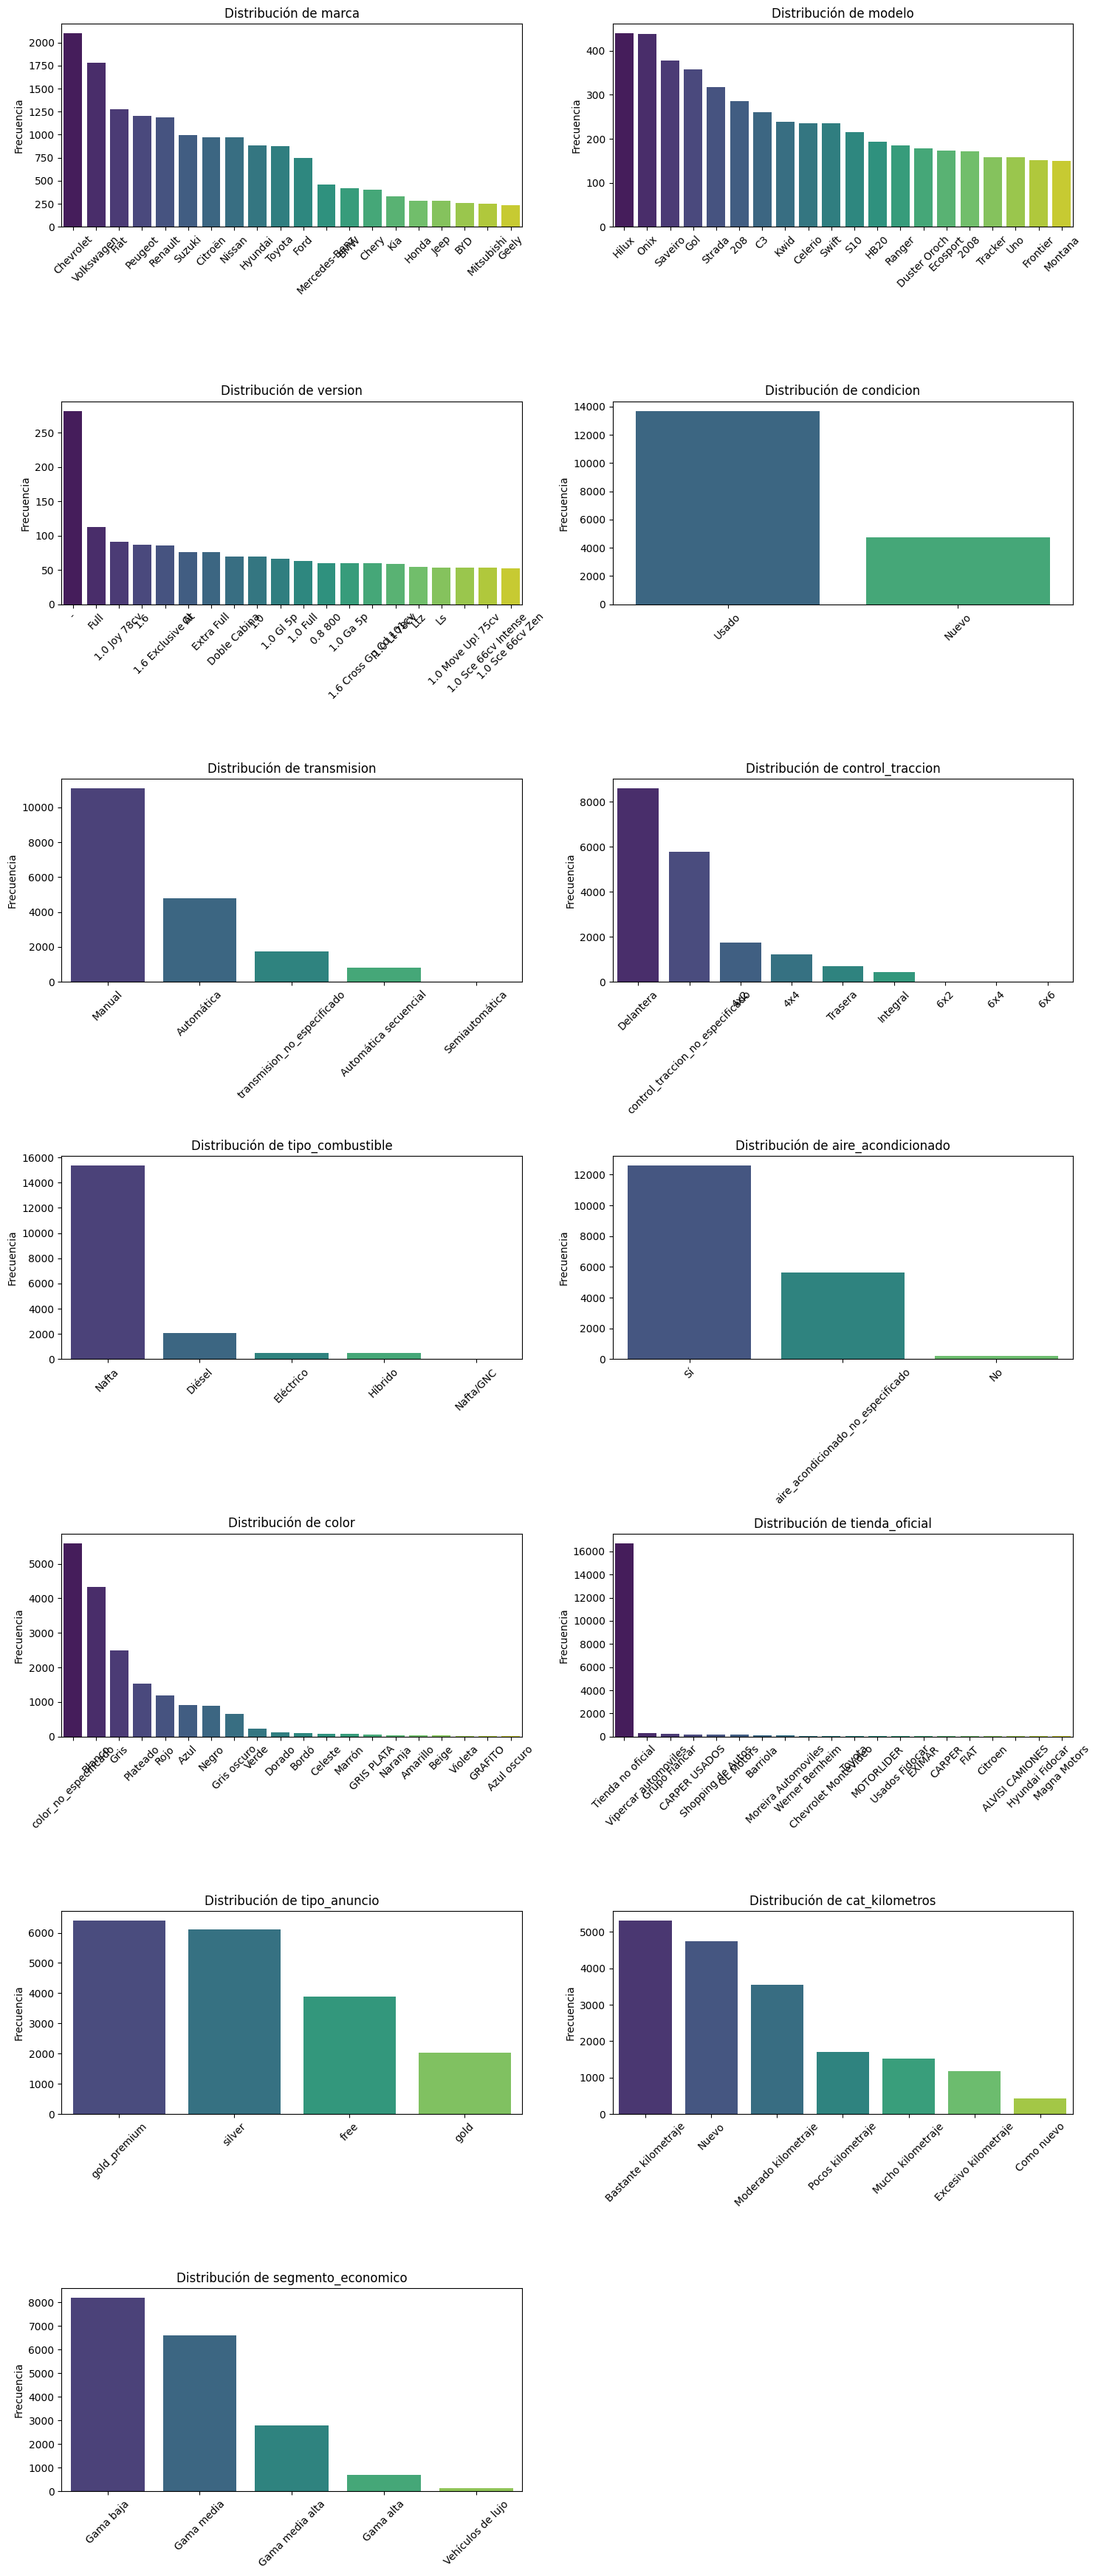

In [479]:
pinta_distribucion_categoricas(df_vehiculos_final, categoricas_vehiculos)

In [480]:
for catego in categoricas_vehiculos: 
    print(f'Para {catego}')
    print(df_vehiculos_final[catego].value_counts()/len(df_vehiculos_final)*100)
    print('\n'*2)

Para marca
marca
Chevrolet               11.377570
Volkswagen               9.673919
Fiat                     6.928544
Peugeot                  6.543324
Renault                  6.423960
                          ...    
LMI                      0.005426
Wuxi                     0.005426
UMEV                     0.005426
Zna                      0.005426
Ford escort gt ingle     0.005426
Name: count, Length: 179, dtype: float64



Para modelo
modelo
Hilux                    2.381857
Onix                     2.376431
Saveiro                  2.045467
Gol                      1.942380
Strada                   1.719928
                           ...   
306 xn break             0.005426
458 Italia               0.005426
360                      0.005426
JAC REFINE CARGO VAN     0.005426
Box Refrigerado -18°c    0.005426
Name: count, Length: 1651, dtype: float64



Para version
version
-                            1.530031
Full                         0.613097
1.0 Joy 78cv                 0

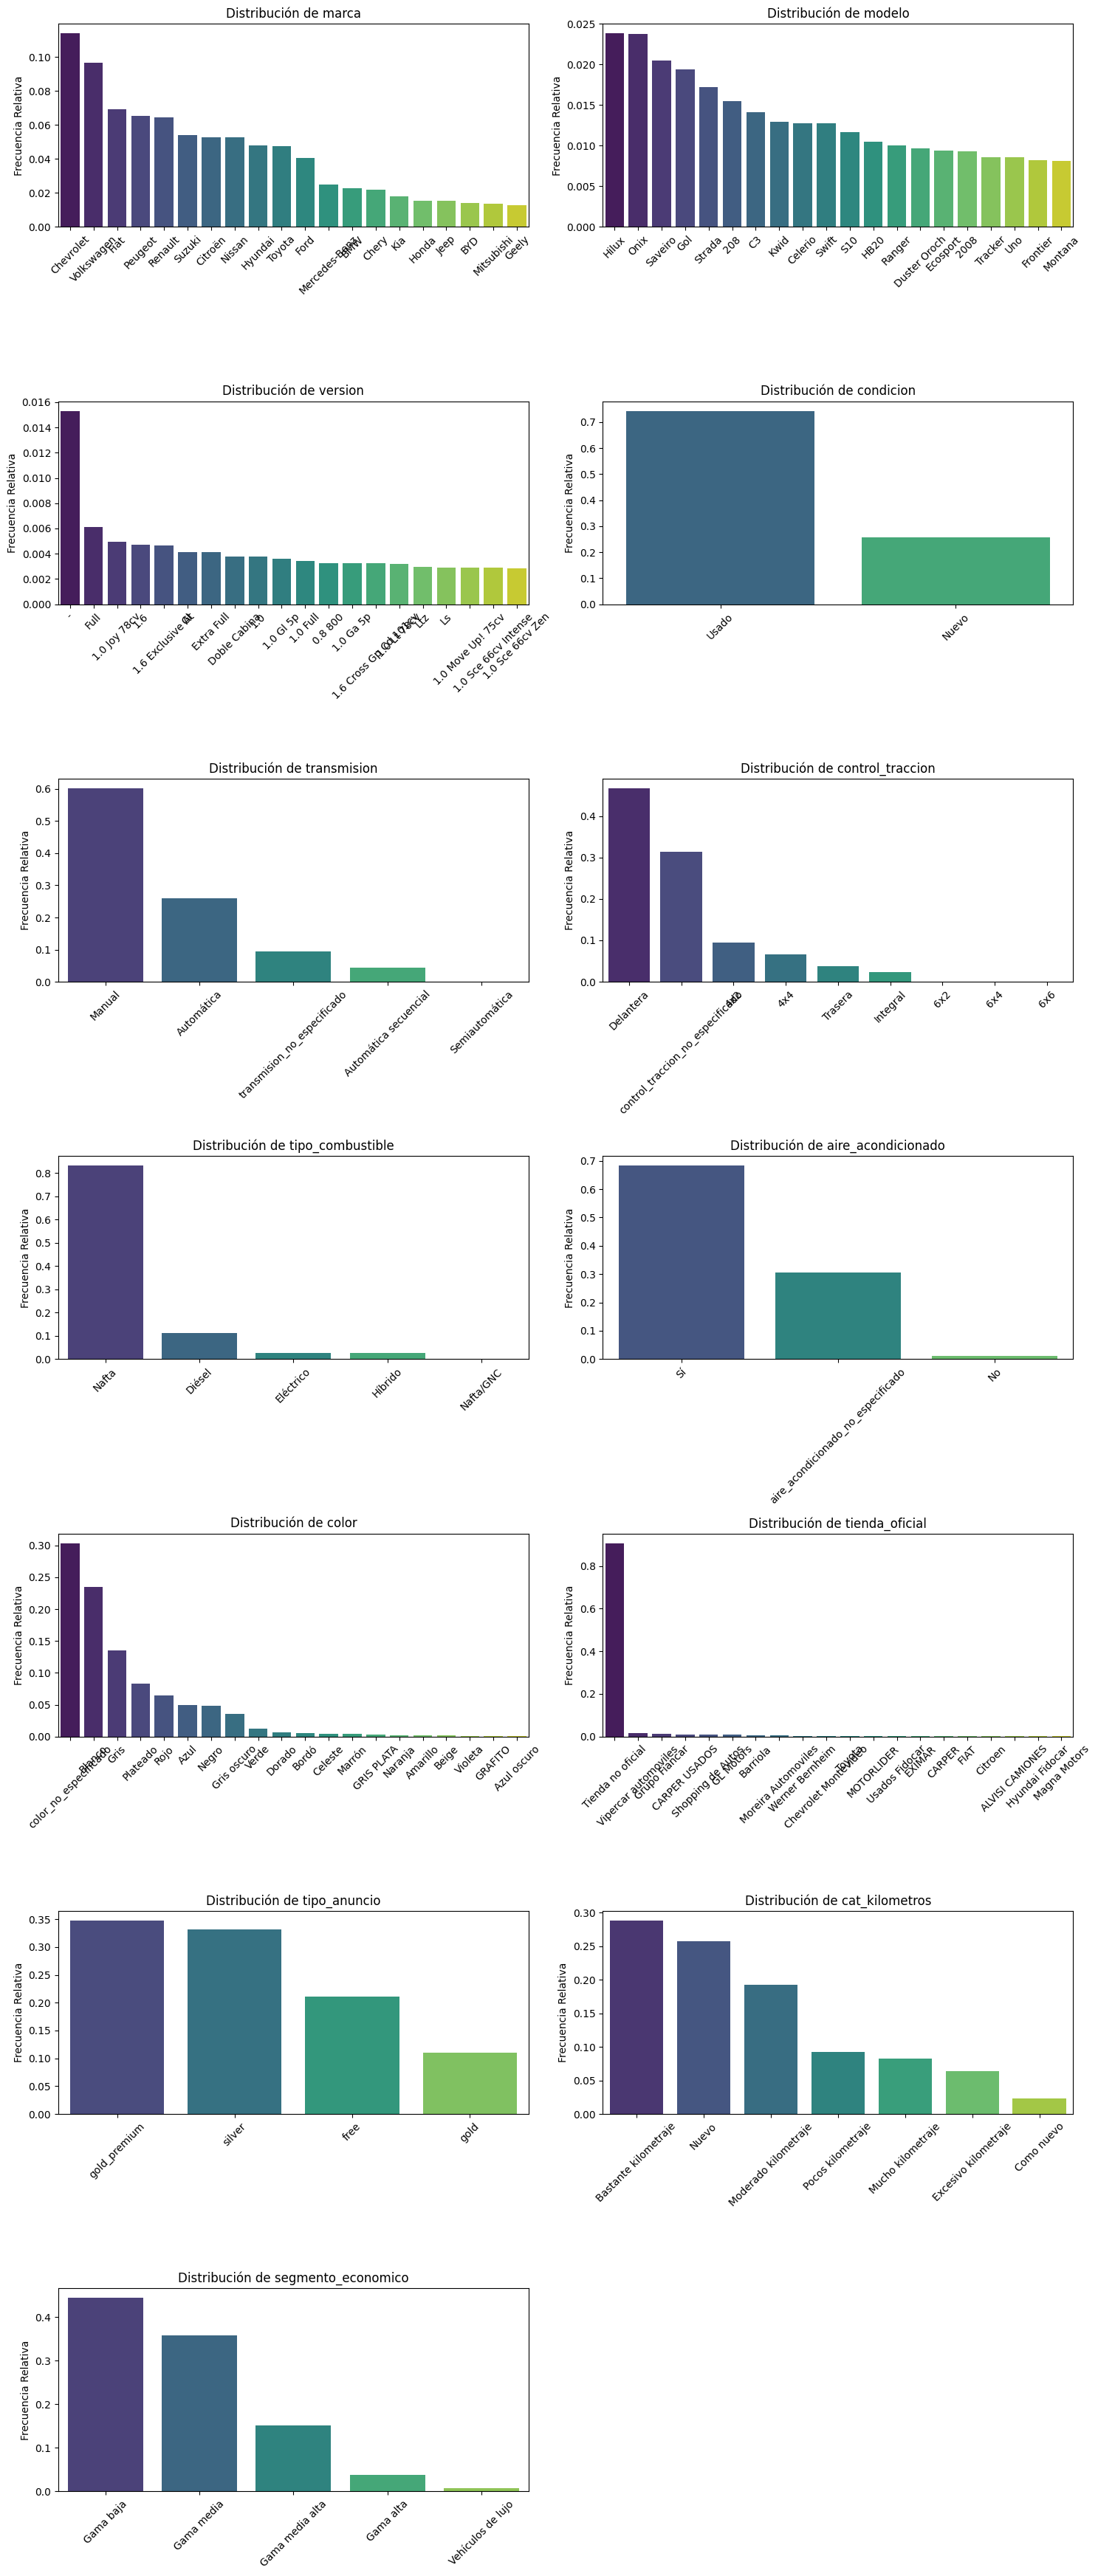

In [481]:
pinta_distribucion_categoricas(df_vehiculos_final, categoricas_vehiculos, relativa = True)

## Medidas de posición

In [482]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [483]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [484]:
# columnas numéricas:
columnas_numericas_vehiculos = [
    "precio",
    "anio_vehiculo",
    "kilometraje",
]

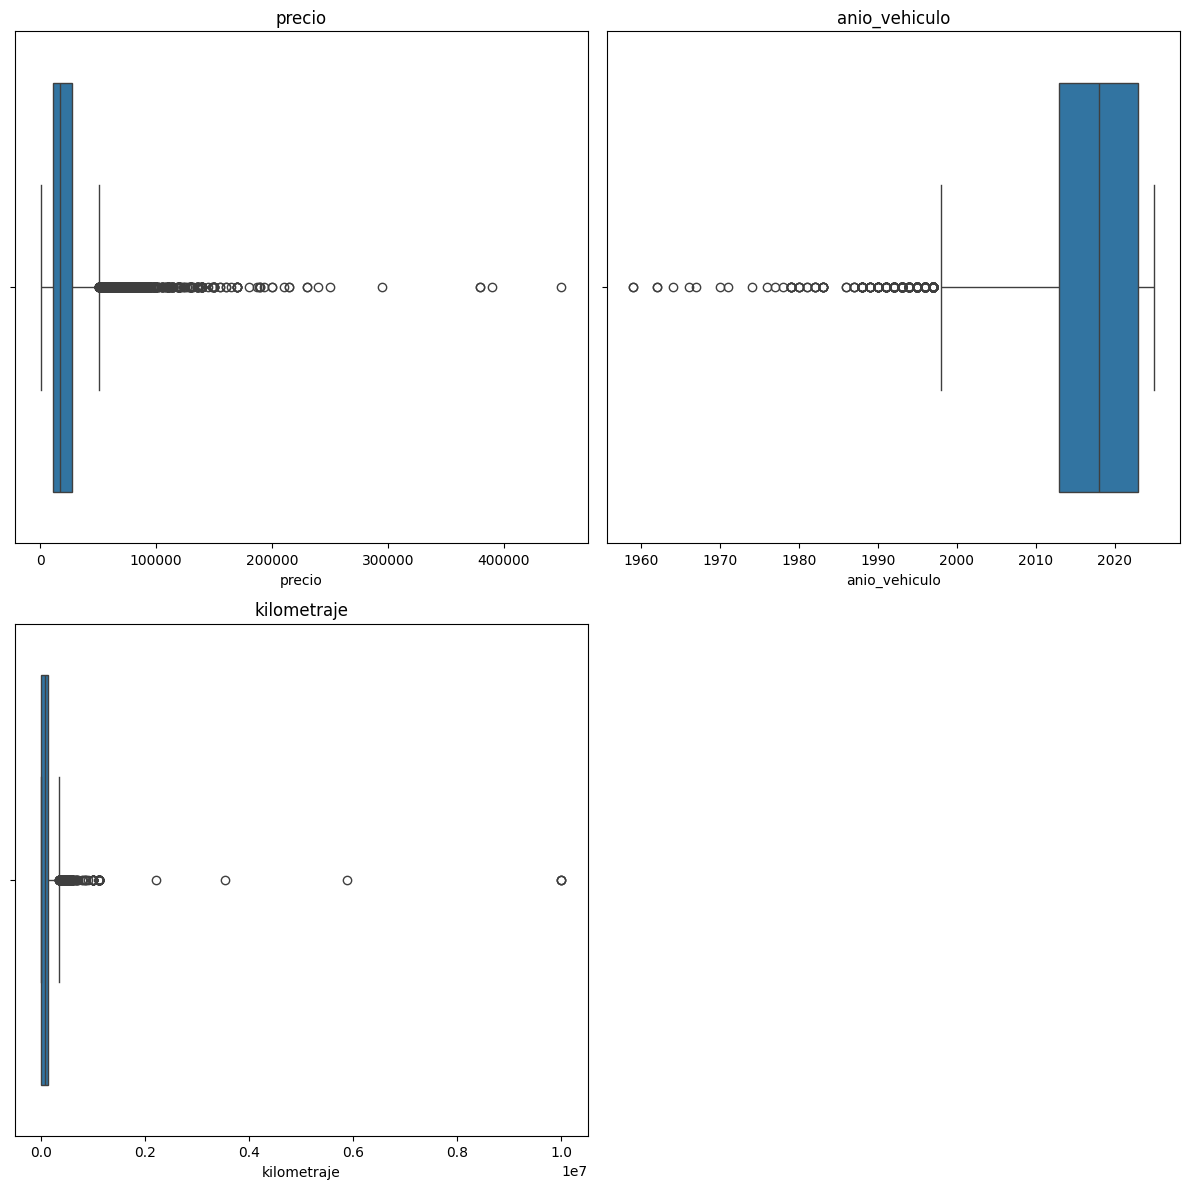

In [485]:
plot_multiple_boxplots(df_vehiculos_final, columnas_numericas_vehiculos)

In [486]:
df_vehiculos_final.kilometraje.value_counts()

kilometraje
0         4685
140000     222
120000     210
130000     207
150000     192
          ... 
117624       1
124902       1
111929       1
137147       1
70673        1
Name: count, Length: 3075, dtype: int64

In [487]:
# Rango
df_vehiculos_final.describe().loc["max"] - df_vehiculos_final.describe().loc["min"]

precio           4.495030e+05
anio_vehiculo    6.600000e+01
kilometraje      9.999999e+06
puertas          1.405000e+03
id_seller        1.911393e+09
dtype: float64

## Histogramas

In [488]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [489]:


def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

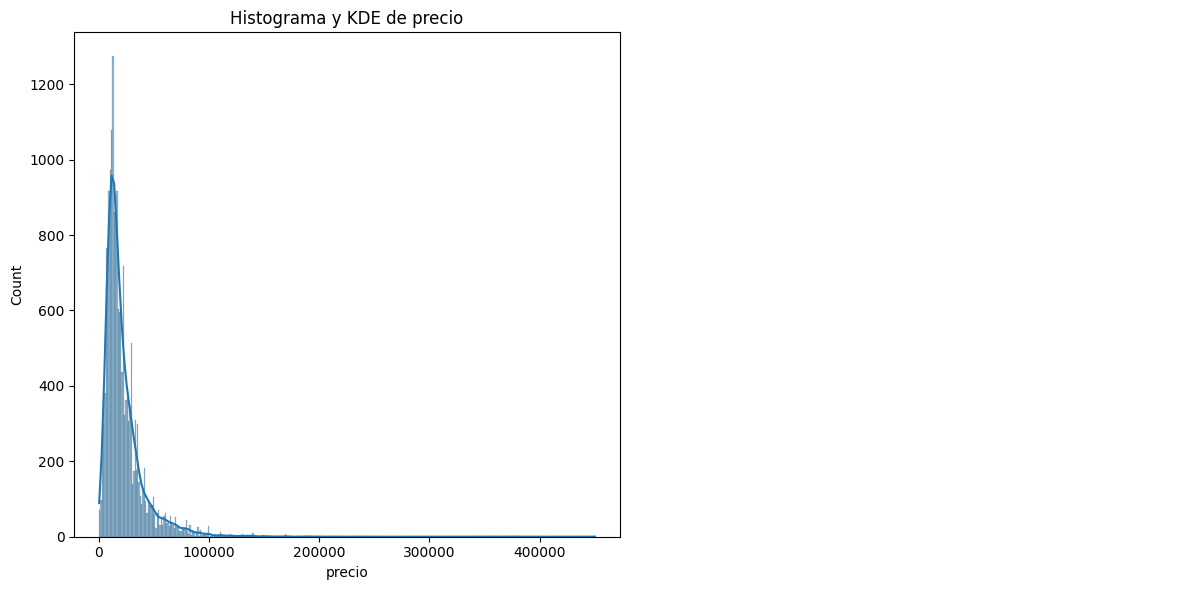

In [490]:
plot_histo_den(df_vehiculos_final,["precio"])
#Se parece a una distribución log Normal

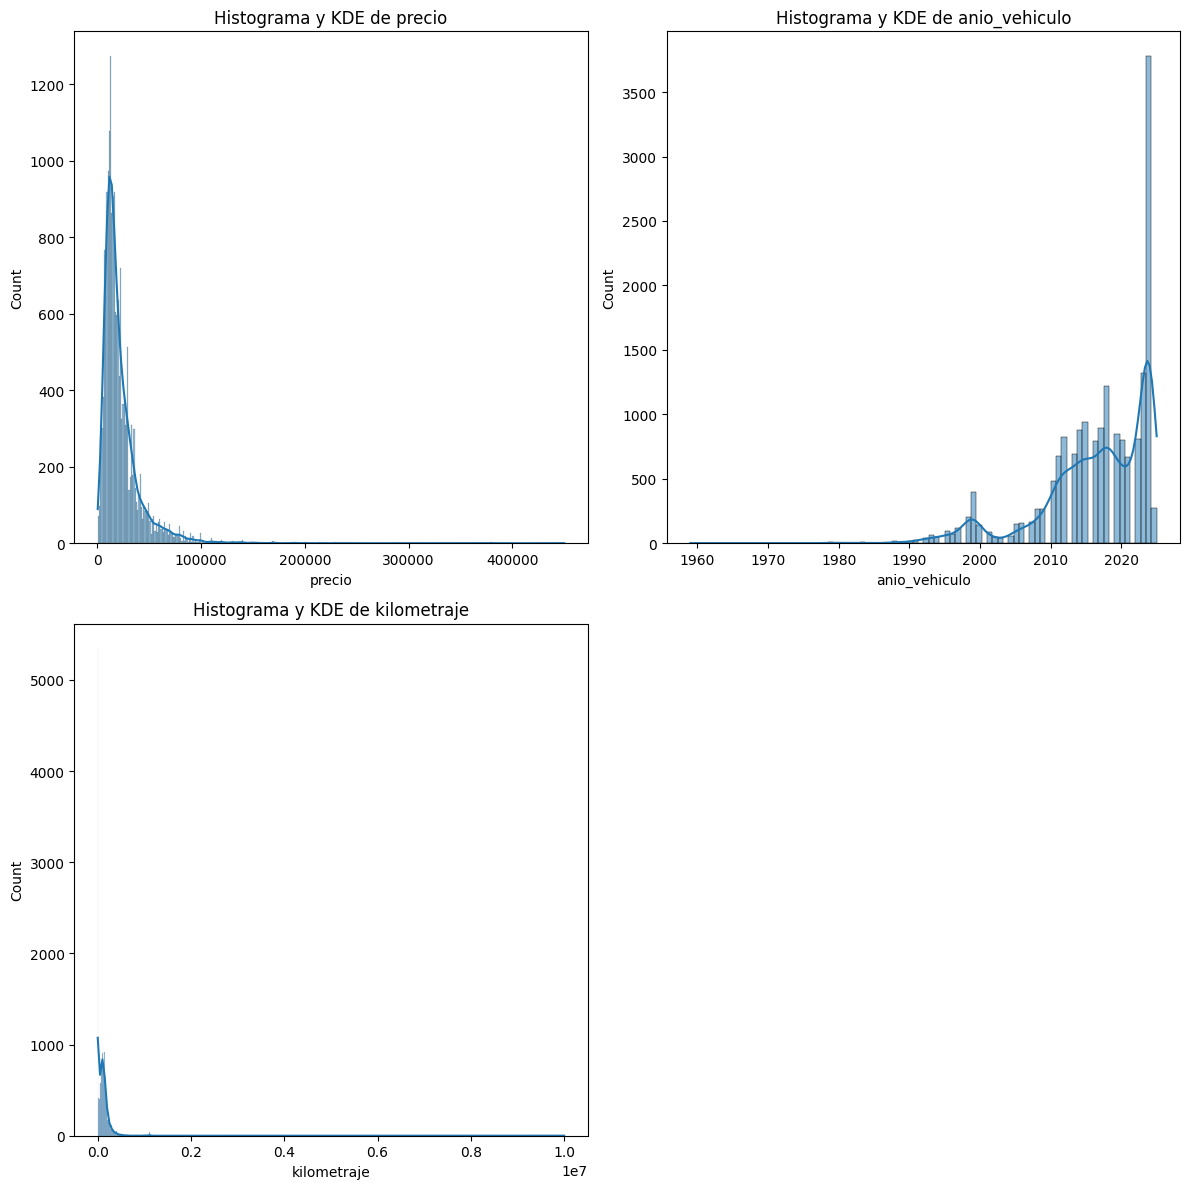

In [491]:
plot_histo_den(df_vehiculos_final,columnas_numericas_vehiculos)

In [492]:
df_vehiculos_final.to_csv('data/vehiculos_uy_final', index=True)

## Visualizaciones con matplotlib

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/363179974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marcas.index, y=top_marcas.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/363179974.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_marcas_relativa.index, y=top_marcas_relativa.values, ax=axes[1], palette='viridis')


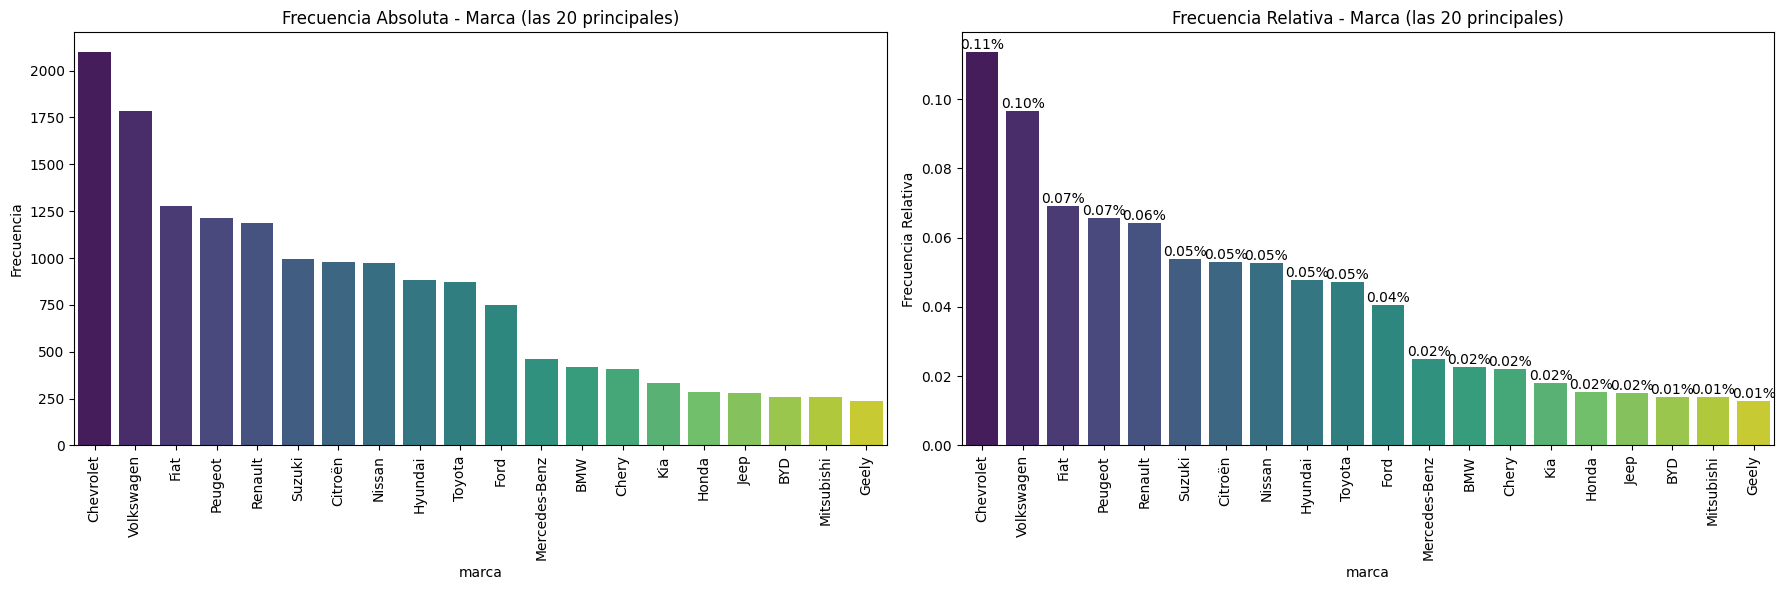

In [528]:
# Selección de las top 10 marcas
top_marcas = df_vehiculos['marca'].value_counts().nlargest(20)
top_marcas_relativa = df_vehiculos['marca'].value_counts(normalize=True).nlargest(20)

# Configuración de la figura
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Frecuencia absoluta
sns.barplot(x=top_marcas.index, y=top_marcas.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Marca (las 20 principales)')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Frecuencia relativa
barplot_relativo = sns.barplot(x=top_marcas_relativa.index, y=top_marcas_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Marca (las 20 principales)')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')


plt.tight_layout()
plt.show()

In [1]:
# 'condicion'
top_condicion = df_vehiculos['condicion'].value_counts()
top_condicion_relativa = df_vehiculos['condicion'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_condicion.index, y=top_condicion.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Condición')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_condicion_relativa.index, y=top_condicion_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Condición')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')


plt.tight_layout()
plt.show()

NameError: name 'df_vehiculos' is not defined

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/1680758027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kilometros.index, y=top_kilometros.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/1680758027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_kilometros_relativa.index, y=top_kilometros_relativa.values, ax=axes[1], palette='viridis')


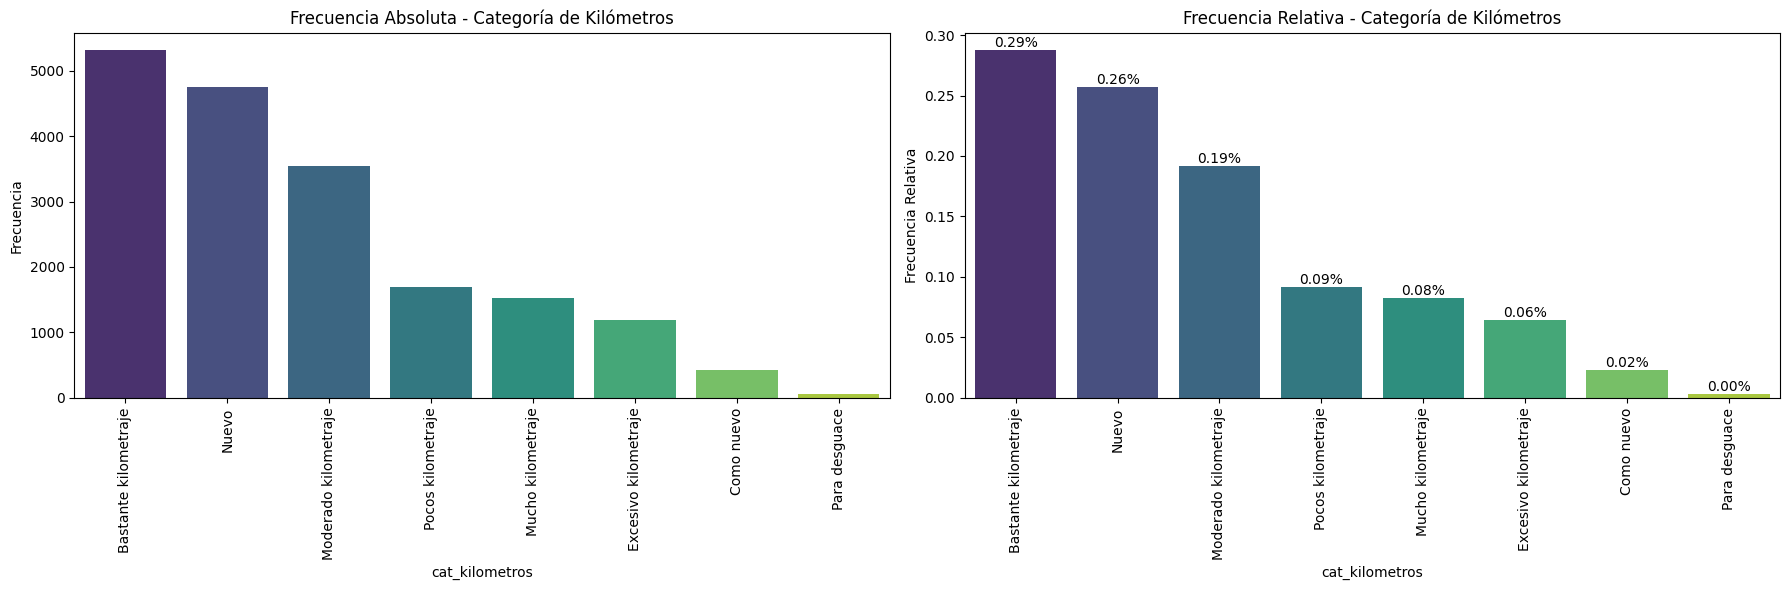

In [524]:
# Frecuencia absoluta y relativa de la categoría de kilómetros
top_kilometros = df_vehiculos['cat_kilometros'].value_counts()
top_kilometros_relativa = df_vehiculos['cat_kilometros'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_kilometros.index, y=top_kilometros.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Categoría de Kilómetros')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_kilometros_relativa.index, y=top_kilometros_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Categoría de Kilómetros')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')
    
plt.tight_layout()
plt.show()

In [506]:
df_vehiculos.cat_kilometros.info()

<class 'pandas.core.series.Series'>
Index: 18483 entries, MLU641972861 to MLU684441434
Series name: cat_kilometros
Non-Null Count  Dtype 
--------------  ----- 
18483 non-null  object
dtypes: object(1)
memory usage: 804.8+ KB


/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/1956120008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_modelos.index, y=top_modelos.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/1956120008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_modelos_relativa.index, y=top_modelos_relativa.values, ax=axes[1], palette='viridis')


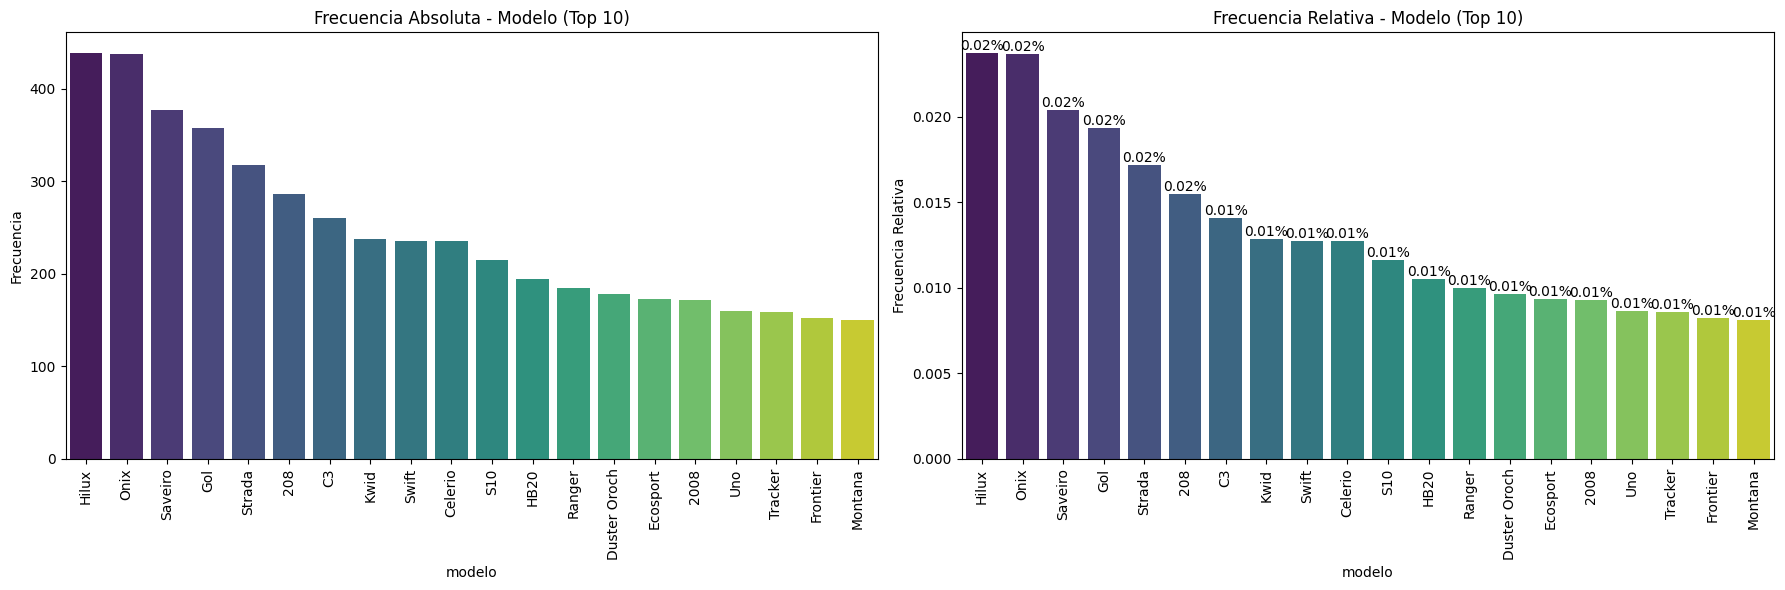

In [523]:
# Frecuencia absoluta y relativa de modelos (Top 10)
top_modelos = df_vehiculos['modelo'].value_counts().nlargest(20)
top_modelos_relativa = df_vehiculos['modelo'].value_counts(normalize=True).nlargest(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_modelos.index, y=top_modelos.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Modelo (Top 10)')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_modelos_relativa.index, y=top_modelos_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Modelo (Top 10)')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')
    
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/113387578.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_absoluto = sns.barplot(x=top_segmento.index, y=top_segmento.values, ax=axes[0], palette='viridis', legend=False)
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/113387578.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_segmento_relativa.index, y=top_segmento_relativa.values, ax=axes[1], palette='viridis', legend=False)


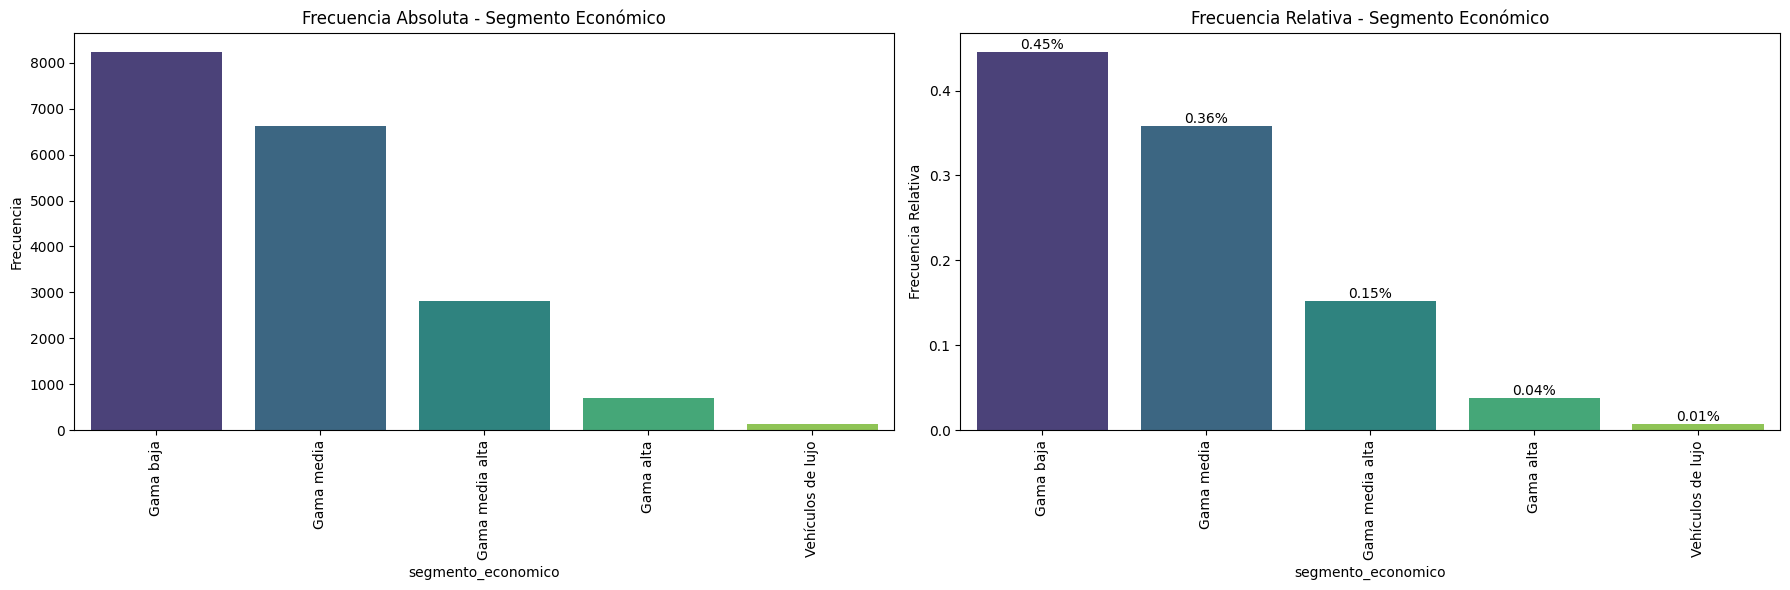

In [518]:
# Frecuencia absoluta y relativa de tipos de combustible
top_segmento = df_vehiculos['segmento_economico'].value_counts().nlargest(10)
top_segmento_relativa = df_vehiculos['segmento_economico'].value_counts(normalize=True).nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Frecuencia absoluta
barplot_absoluto = sns.barplot(x=top_segmento.index, y=top_segmento.values, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Frecuencia Absoluta - Segmento Económico')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Frecuencia relativa
barplot_relativo = sns.barplot(x=top_segmento_relativa.index, y=top_segmento_relativa.values, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Frecuencia Relativa - Segmento Económico')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

# Añadir etiquetas de porcentaje
for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/812510460.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_combustible.index, y=top_combustible.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/812510460.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_combustible_relativa.index, y=top_combustible_relativa.values, ax=axes[1], palette='viridis')


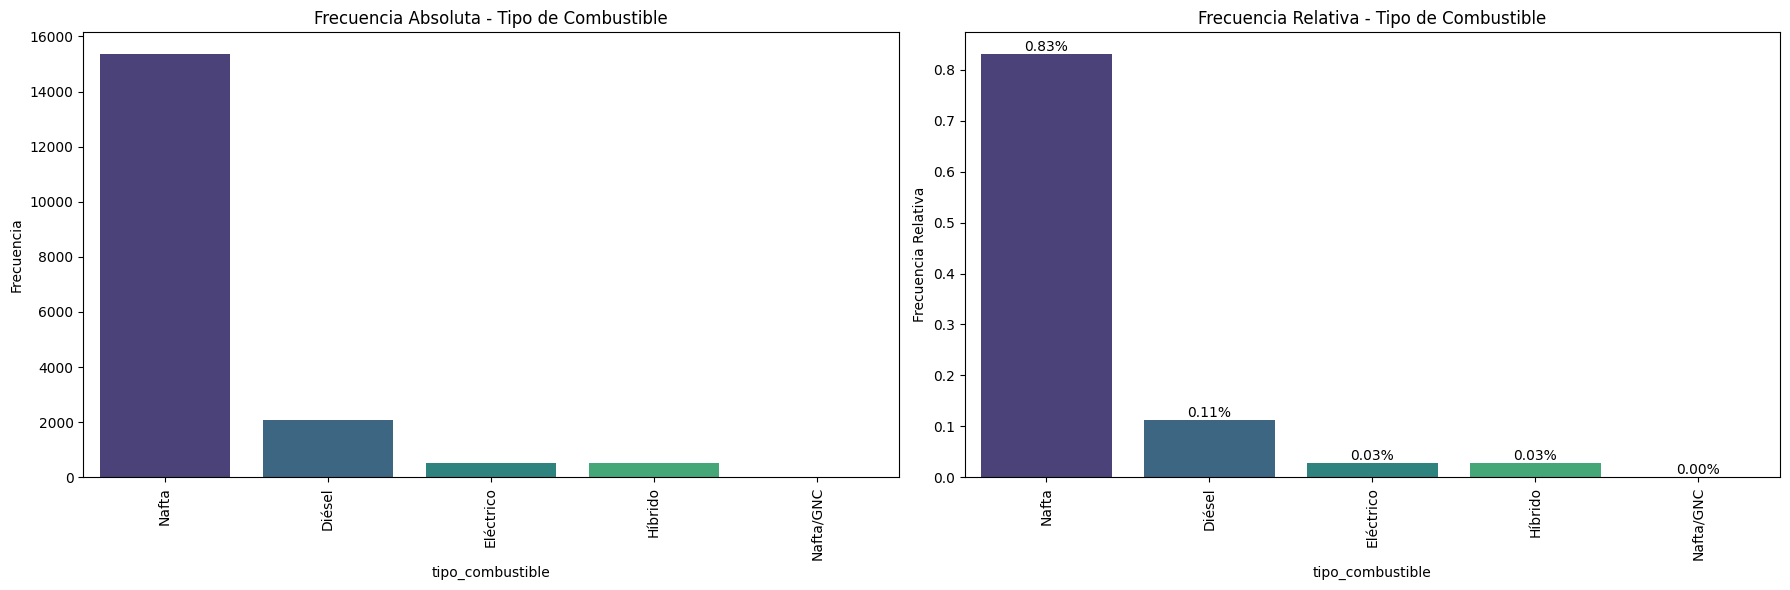

In [530]:
# Frecuencia absoluta y relativa de tipos de combustible
top_combustible = df_vehiculos['tipo_combustible'].value_counts().nlargest(10)  # Muestra los 10 principales tipos
top_combustible_relativa = df_vehiculos['tipo_combustible'].value_counts(normalize=True).nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Frecuencia absoluta
sns.barplot(x=top_combustible.index, y=top_combustible.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Tipo de Combustible')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Frecuencia relativa
barplot_relativo = sns.barplot(x=top_combustible_relativa.index, y=top_combustible_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Tipo de Combustible')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')
    
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/1443181722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_transmision.index, y=top_transmision.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_32208/1443181722.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_transmision_relativa.index, y=top_transmision_relativa.values, ax=axes[1], palette='viridis')


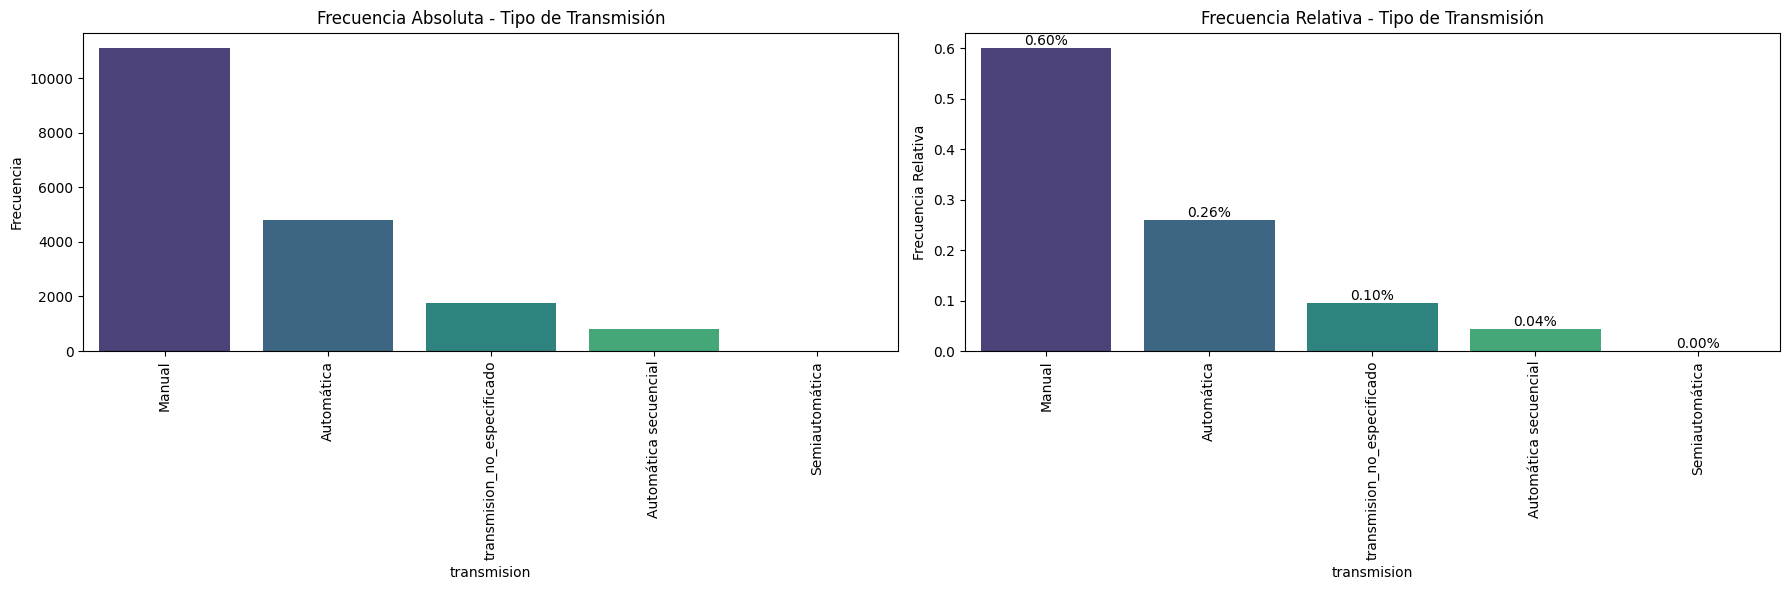

In [531]:
# Frecuencia absoluta y relativa de tipos de transmisión
top_transmision = df_vehiculos['transmision'].value_counts()
top_transmision_relativa = df_vehiculos['transmision'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_transmision.index, y=top_transmision.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Tipo de Transmisión')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_transmision_relativa.index, y=top_transmision_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Tipo de Transmisión')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()